In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math
from regressors import stats as st_reg
from sklearn.linear_model import Ridge, ElasticNet, Lasso
from sklearn.metrics import r2_score 

import warnings
warnings.filterwarnings("ignore")

C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### ANALYZING THE DATA

In [2]:
# loading the data 
MPI_df = pd.read_excel("MPI.xlsx")
MPI_df.head()

,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,landscan_pop,mpi_headcount,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,30758,0.064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,19802,0.282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,26452,0.212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,62266,0.081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,23144,0.369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# select the columns we have
columns = ['FID', 'Prov_ID', 'Province', 'Dist_ID', 'District', 'Sect_ID','Sector', 'nightlight_sum', 'landscan_pop', 
           'mpi_headcount','mpi_intensity', 'mpi','AREA']

# use the columns given
MPI_data = MPI_df[columns]
MPI_data

,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi,AREA
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,30758,0.064,0.412,0.027,0.000086
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,19802,0.282,0.445,0.126,0.001903
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,26452,0.212,0.434,0.092,0.002370
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,62266,0.081,0.409,0.033,0.000277
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,23144,0.369,0.430,0.159,0.004290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,411,5,Eastern Province,57,Bugesera,5711,Nyarugenge,5.189044,23007,0.536,0.459,0.246,0.003702
412,412,5,Eastern Province,57,Bugesera,5712,Rilima,13.912351,32334,0.331,0.429,0.142,0.006574
413,413,5,Eastern Province,57,Bugesera,5713,Ruhuha,8.912983,24332,0.438,0.448,0.196,0.003581
414,414,5,Eastern Province,57,Bugesera,5714,Rweru,18.714766,30867,0.519,0.487,0.253,0.017524


In [4]:
# check information of the data
MPI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FID             416 non-null    int64  
 1   Prov_ID         416 non-null    int64  
 2   Province        416 non-null    object 
 3   Dist_ID         416 non-null    int64  
 4   District        416 non-null    object 
 5   Sect_ID         416 non-null    int64  
 6   Sector          416 non-null    object 
 7   nightlight_sum  416 non-null    float64
 8   landscan_pop    416 non-null    int64  
 9   mpi_headcount   416 non-null    float64
 10  mpi_intensity   416 non-null    float64
 11  mpi             416 non-null    float64
 12  AREA            416 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 42.4+ KB


In [5]:
# check NaN values
# no NaN values in the data
MPI_data.isnull().sum()

FID               0
Prov_ID           0
Province          0
Dist_ID           0
District          0
Sect_ID           0
Sector            0
nightlight_sum    0
landscan_pop      0
mpi_headcount     0
mpi_intensity     0
mpi               0
AREA              0
dtype: int64

In [6]:
# check summary statisctis
MPI_data.describe()

,FID,Prov_ID,Dist_ID,Sect_ID,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi,AREA
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,207.500000,3.259615,36.389423,3646.641827,37.518715,28189.257212,0.379875,0.444382,0.170344,0.004747
std,120.233107,1.281905,13.039228,1304.385670,86.915931,10998.628426,0.116088,0.017566,0.055538,0.004903
min,0.000000,1.000000,11.000000,1101.000000,0.600450,7649.000000,0.047000,0.381000,0.018000,0.000086
25%,103.750000,2.000000,26.000000,2601.750000,3.289344,20813.750000,0.322750,0.434000,0.141000,0.002781
50%,207.500000,3.000000,36.000000,3609.500000,7.111642,26402.000000,0.393000,0.444000,0.173000,0.003910
75%,311.250000,4.000000,45.000000,4512.250000,20.087663,32761.750000,0.457250,0.456000,0.205250,0.005090
max,415.000000,5.000000,57.000000,5715.000000,597.629226,74297.000000,0.728000,0.494000,0.359000,0.052537


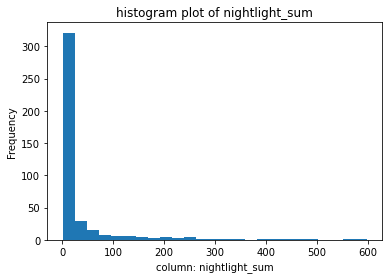

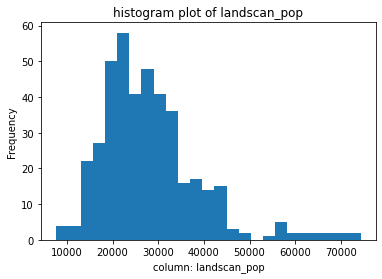

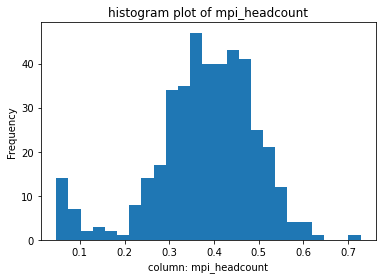

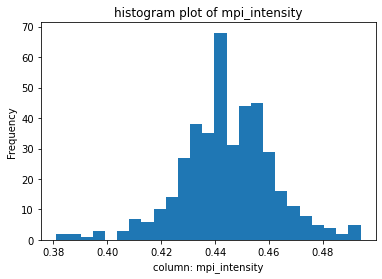

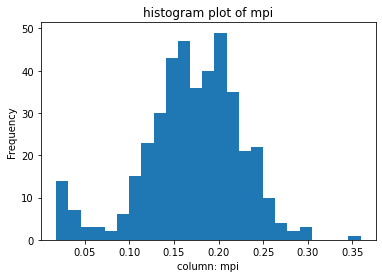

In [7]:
# Ploting histograms of each of the features and the dependent variable
features = ['nightlight_sum', 'landscan_pop', 'mpi_headcount','mpi_intensity', 'mpi']

# Extracting dependent and independent features from the data
MPI_data_features = MPI_data[features]

# use loop to plot histogram for each feature

for feature in features:
    plt.hist(MPI_data_features[feature], bins=25)
    plt.ylabel("Frequency")
    plt.xlabel(f"column: {feature}")
    plt.title(f"histogram plot of {feature}")
    plt.show()

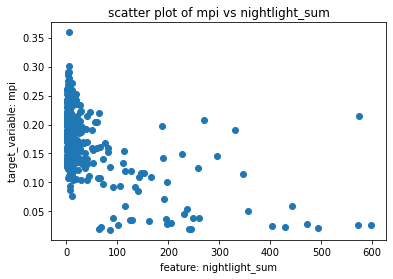

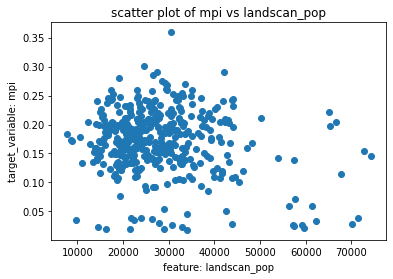

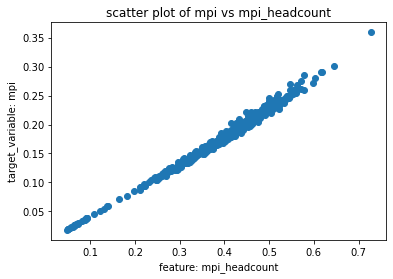

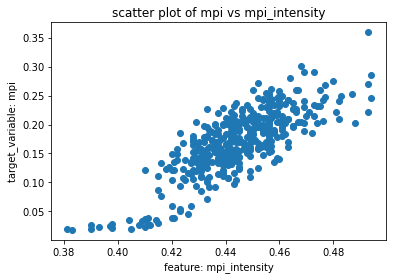

In [8]:
# plotting scatter plots of the mpi (dependent/target variable) vs each of the features

# Extracting dependent and independent features from MPI_data_features
MPI_data_Ind_features = MPI_data_features.drop("mpi", axis=1)
MPI_data_target = MPI_data_features["mpi"]

# use loop to plot scatter for each feature vs target variable

for feature in MPI_data_Ind_features.columns:
    plt.scatter(MPI_data_Ind_features[feature], MPI_data_target)
    plt.ylabel(f"target_variable: mpi")
    plt.xlabel(f"feature: {feature}")
    plt.title(f"scatter plot of mpi vs {feature}")
    plt.show()

In [9]:
# Calculating the correlations for each feature (Xi) with the MPI (y)

X = MPI_data_Ind_features
y = MPI_data_target

# Using loop to calculate the correlation between each feature and the target output
# 1. X vs y
Corr_X_vs_y = {}
for feature in X.columns:
    Corr_X_vs_y[feature] = X[feature].corr(y)

# create dataframe of these correlations
Corr_X_vs_y_df = pd.DataFrame(Corr_X_vs_y, index=['X vs y'])
    
# 2. log(X) vs y
Corr_logX_vs_y = {}
for feature in X.columns:
    Corr_logX_vs_y[feature] = np.log(X[feature]).corr(y)
    
# create dataframe of these correlations
Corr_logX_vs_y_df = pd.DataFrame(Corr_logX_vs_y, index=['log(X) vs y'])
    
# 3. X vs log(y)
Corr_X_vs_logy = {}
for feature in X.columns:
    Corr_X_vs_logy[feature] = X[feature].corr(np.log(y))
    
# create dataframe of these correlations
Corr_X_vs_logy_df = pd.DataFrame(Corr_X_vs_logy, index=['X vs log(y)'])
    
# 4. log(X) vs log(y)
Corr_logX_vs_logy = {}
for feature in X.columns:
    Corr_logX_vs_logy[feature] = np.log(X[feature]).corr(np.log(y))
    
# create dataframe of these correlations
Corr_logX_vs_logy_df = pd.DataFrame(Corr_logX_vs_logy, index=['log(X) vs log(y)'])
    


In [10]:
# Joining all the data frame together to form one final table
final_corr_table = ((Corr_X_vs_y_df.append(Corr_logX_vs_y_df)).append(Corr_X_vs_logy_df)).append(Corr_logX_vs_logy_df)
final_corr_table

,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity
X vs y,-0.528349,-0.172782,0.995378,0.799883
log(X) vs y,-0.575816,-0.113587,0.922131,0.803473
X vs log(y),-0.638927,-0.223342,0.942200,0.769113
log(X) vs log(y),-0.617078,-0.160110,0.998507,0.781876


### CREATING FINAL FEATURES

In [11]:
# creating two featues: Nightlight-per-capita and population-density
# Nightlight-per-capita = nightlight-sum / landscan-pop
# population-density = landscan-pop / Area

MPI_data_features['nightlight_per_capita'] = MPI_data['nightlight_sum'] / MPI_data['landscan_pop']
MPI_data_features['population_density'] = MPI_data['landscan_pop'] / MPI_data['AREA']

final_features = ['nightlight_per_capita','population_density','mpi']

MPI_data_final_features = MPI_data_features[final_features]
MPI_data_final_features.head()

,nightlight_per_capita,population_density,mpi
0,0.003293,3.556028e+08,0.027
1,0.004296,1.040623e+07,0.126
2,0.005065,1.116131e+07,0.092
3,0.002601,2.249614e+08,0.033
4,0.002135,5.394657e+06,0.159


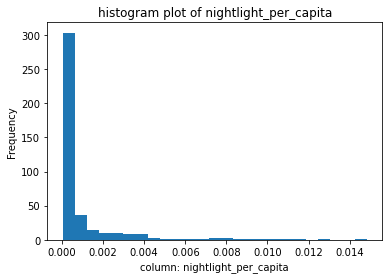

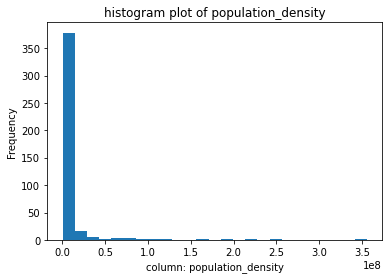

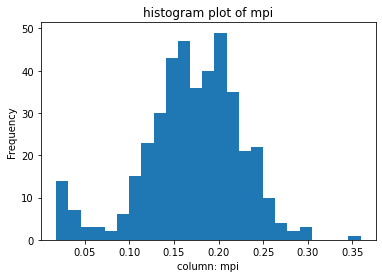

In [12]:
# Ploting histograms of each of the features and the dependent variable
# use loop to plot histogram for each feature

for feature in MPI_data_final_features.columns:
    plt.hist(MPI_data_final_features[feature], bins=25)
    plt.ylabel("Frequency")
    plt.xlabel(f"column: {feature}")
    plt.title(f"histogram plot of {feature}")
    plt.show()

In [13]:
# Calculating the correlations for each feature (Xi) with the MPI (y)

X = MPI_data_final_features.drop('mpi', axis=1)
y = MPI_data_final_features['mpi']

# Using loop to calculate the correlation between each feature and the target output
# 1. X vs y
Corr_X_vs_y = {}
for feature in X.columns:
    Corr_X_vs_y[feature] = X[feature].corr(y)

# create dataframe of these correlations
Corr_X_vs_y_df = pd.DataFrame(Corr_X_vs_y, index=['X vs y'])
    
# 2. log(X) vs y
Corr_logX_vs_y = {}
for feature in X.columns:
    Corr_logX_vs_y[feature] = np.log(X[feature]).corr(y)
    
# create dataframe of these correlations
Corr_logX_vs_y_df = pd.DataFrame(Corr_logX_vs_y, index=['log(X) vs y'])
    
# 3. X vs log(y)
Corr_X_vs_logy = {}
for feature in X.columns:
    Corr_X_vs_logy[feature] = X[feature].corr(np.log(y))
    
# create dataframe of these correlations
Corr_X_vs_logy_df = pd.DataFrame(Corr_X_vs_logy, index=['X vs log(y)'])
    
# 4. log(X) vs log(y)
Corr_logX_vs_logy = {}
for feature in X.columns:
    Corr_logX_vs_logy[feature] = np.log(X[feature]).corr(np.log(y))
    
# create dataframe of these correlations
Corr_logX_vs_logy_df = pd.DataFrame(Corr_logX_vs_logy, index=['log(X) vs log(y)'])
    


In [14]:
# Joining all the data frame together to form one final table
final_corr_table = ((Corr_X_vs_y_df.append(Corr_logX_vs_y_df)).append(Corr_X_vs_logy_df)).append(Corr_logX_vs_logy_df)
final_corr_table

,nightlight_per_capita,population_density
X vs y,-0.546978,-0.487136
log(X) vs y,-0.605358,-0.617437
X vs log(y),-0.660497,-0.668281
log(X) vs log(y),-0.638304,-0.745331


## MODEL BUILDING

In [15]:
# Extracting dependent and independent variables
X = MPI_data_final_features.drop('mpi', axis=1)
y = MPI_data_final_features['mpi']

# Recall the highest correlations obtained from above
max_correlations = ['X vs log(y)', 'log(X) vs log(y)']

# from the previous insight, I have obtained that for population_density, the maximum correlation is at 'log(X) vs log(y)'
# and for nightlight-per-capita, the maximum correlation is at 'X vs log(y)'


In [16]:
# Therefore, in this case, I will need to compute the log of population-density
X['log_population_density'] = np.log(X['population_density'])
y = np.log(y)
# then drop the population density
X = X.drop('population_density', axis=1)

### Model1. BACKWARD-STEPWISE-REGRESSION

In [17]:
# define backward_regression function to return Pvalues, best features and summary statistics of the model

def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    # create list of columns 
    included=list(X.columns)
    # set condition
    while True:
        # create empty dictionary to store pvalues for each feature
        Pvalues_step = {}
        changed=False
        # create the model
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        # appending pvaleus into the dictionary created 
        Pvalues_step[included[0]] = pvalues[0]
        Pvalues_step[included[1]] = pvalues[1]
        
        worst_pval = pvalues.max() # null if pvalues is empty
        # set the condition for pvalue
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            # if condition met, remove feature from included list
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    # returning pvalues, selected features and model summary
    return Pvalues_step, included, model.summary()

In [18]:
# calling the function above
backward_regression(X, y, 0.05, verbose=False)

({'nightlight_per_capita': 8.738206186363839e-38,
  'log_population_density': 3.5319105179816703e-59},
 ['nightlight_per_capita', 'log_population_density'],
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    mpi   R-squared:                       0.702
 Model:                            OLS   Adj. R-squared:                  0.701
 Method:                 Least Squares   F-statistic:                     486.7
 Date:                Sat, 10 Dec 2022   Prob (F-statistic):          2.46e-109
 Time:                        20:04:54   Log-Likelihood:                -42.884
 No. Observations:                 416   AIC:                             91.77
 Df Residuals:                     413   BIC:                             103.9
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                   

In [19]:
# And then let extract and get the p-values for this model
Pvalues_stepwise_model = backward_regression(X, y, 0.05, verbose=False)[0]
Pvalues_stepwise_model

{'nightlight_per_capita': 8.738206186363839e-38,
 'log_population_density': 3.5319105179816703e-59}

### Uisng OLS Model to find the final p-value of the model

In [20]:
# build the model
X_ols = sm.add_constant(X)
# call the model
OLS_model = sm.OLS(y, X_ols).fit()
# generate predictions
predictions = OLS_model.predict(X_ols)
# calculating the overal pvalue
Overal_p_value = stats.ttest_ind(y, predictions).pvalue
Overal_p_value

0.9999999999999268

In [21]:
# use math.floor method to print decimals on overal pvalue of the model 
Pvalues_stepwise_model['Overal-pvalue-of-model']=math.floor(Overal_p_value * 10000)/10000.0

# make data frame of pvaleus to print it as a table
df_pvalues_stpwise = pd.DataFrame(Pvalues_stepwise_model,index=['Pvalues'])
df_pvalues_stpwise

,nightlight_per_capita,log_population_density,Overal-pvalue-of-model
Pvalues,8.738206e-38,3.531911e-59,0.9999


### Model2. Ridge-Regression

In [22]:
# building the model and generate predictions
# call model
Ridge_model = Ridge(alpha=0.00001)
Ridge_model.fit(X, y)
Ridge_preds = Ridge_model.predict(X)

# Extract and print pvalues 
Ridge_pvalues = st_reg.coef_pval(Ridge_model, X, y)
print(f'the pvalue for nightlight_per_capita: {Ridge_pvalues[0]}')
print(f'the pvalue for log_population_density: {Ridge_pvalues[1]}')

the pvalue for nightlight_per_capita: 0.0
the pvalue for log_population_density: 0.0


In [23]:
# calculate the final pvalue of the model
final_Pval = stats.ttest_ind(y, Ridge_preds).pvalue
print(f'The final pvalue of the model is {final_Pval}')

The final pvalue of the model is 0.9999999999999831


In [24]:
# create dictionary of pvalues for each feature
Pvalues_Ridge = {'nightlight_per_capita':Ridge_pvalues[0], 'log_population_density':Ridge_pvalues[1], 
          'overal_pvalue':math.floor(final_Pval * 10000)/10000.0}

# make data frame of pvaleus to display it as a table
Pvalues_table = pd.DataFrame(Pvalues_Ridge,index=['Pvalues_Ridge'])
Pvalues_table

,nightlight_per_capita,log_population_density,overal_pvalue
Pvalues_Ridge,0.0,0.0,0.9999


## Model Evaluation

In [25]:
# Building Lasso Regression to predict MPI
# Instantiating the Lasso model
Lasso_model = Lasso(alpha=0.0000001)
Lasso_model.fit(X,y)
# Generating predictions
Lasso_predictions = Lasso_model.predict(X)
Lasso_predictions

array([-3.47744197, -2.28488848, -2.38123434, -3.24709916, -1.84701828,
       -3.66770477, -3.00753637, -2.81006518, -3.82045685, -3.30984487,
       -2.23391944, -2.81000998, -1.79023098, -3.06850122, -2.31442986,
       -2.10091843, -3.43607879, -3.82673449, -3.31252517, -2.95109589,
       -2.52842404, -1.9533925 , -3.586644  , -2.23499675, -1.78113265,
       -2.22939174, -2.90856475, -3.37031082, -3.20895969, -2.9821329 ,
       -3.27178224, -3.05574248, -2.17797149, -3.35963003, -3.33973159,
       -2.2320808 , -1.72863847, -1.63904731, -1.66769993, -1.8028062 ,
       -1.86965105, -1.71792427, -1.71761384, -1.63724381, -1.64379872,
       -1.72549673, -1.66560038, -1.67860669, -1.90069264, -1.74873594,
       -1.71957267, -1.70396979, -1.68742415, -1.75103187, -1.74078742,
       -1.87065535, -1.67256645, -2.10020817, -1.66947285, -1.70959878,
       -1.75074712, -1.23908047, -1.43743079, -1.35776807, -1.63548881,
       -1.64236406, -1.76142049, -1.28504324, -1.72552034, -1.55

In [26]:
# calculating the Correlation between log yhat to log y
Corr_yhat_log_y = np.corrcoef(Lasso_predictions,y) 
Corr_yhat_log_y


array([[1.        , 0.83792371],
       [0.83792371, 1.        ]])

In [27]:
# calculating R-Squared value
R_square = r2_score(y,Lasso_predictions)
R_square

0.7021161378361093

## VISUALIZE THE RESULTS

In [28]:
# adding log_mpi and lasso_predictions to the data frame
MPI_data['log_mpi'] = y
MPI_data['MPI_Estimated'] = Lasso_predictions
MPI_data

,FID,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,nightlight_sum,landscan_pop,mpi_headcount,mpi_intensity,mpi,AREA,log_mpi,MPI_Estimated
0,0,1,Kigali City,11,Nyarugenge,1101,Gitega,101.297202,30758,0.064,0.412,0.027,0.000086,-3.611918,-3.477442
1,1,1,Kigali City,11,Nyarugenge,1102,Kanyinya,85.060422,19802,0.282,0.445,0.126,0.001903,-2.071473,-2.284888
2,2,1,Kigali City,11,Nyarugenge,1103,Kigali,133.991142,26452,0.212,0.434,0.092,0.002370,-2.385967,-2.381234
3,3,1,Kigali City,11,Nyarugenge,1104,Kimisagara,161.933015,62266,0.081,0.409,0.033,0.000277,-3.411248,-3.247099
4,4,1,Kigali City,11,Nyarugenge,1105,Mageregere,49.415699,23144,0.369,0.430,0.159,0.004290,-1.838851,-1.847018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,411,5,Eastern Province,57,Bugesera,5711,Nyarugenge,5.189044,23007,0.536,0.459,0.246,0.003702,-1.402424,-1.722746
412,412,5,Eastern Province,57,Bugesera,5712,Rilima,13.912351,32334,0.331,0.429,0.142,0.006574,-1.951928,-1.656501
413,413,5,Eastern Province,57,Bugesera,5713,Ruhuha,8.912983,24332,0.438,0.448,0.196,0.003581,-1.629641,-1.768173
414,414,5,Eastern Province,57,Bugesera,5714,Rweru,18.714766,30867,0.519,0.487,0.253,0.017524,-1.374366,-1.299086


In [29]:
# save the data frame as excel
MPI_data.to_excel('MPI_data_final.xlsx')